# BioE HW3 
## Vivian Fu; 
Lab partners: Jessica Wu, Snow Xu

In [50]:
# load the text file as string format
with open('romeoandjuliet.txt', 'r') as file:
  txtfile = file.read()

unprocessed_words = txtfile.split()
words = []
for unprocessed_word in unprocessed_words:
    word = ''
    unprocessed_word = unprocessed_word.lower()
    for element in unprocessed_word:
        if element.isalpha():
            word = word + element
    # isalpha() returns true if the element is a letter or a space, so we need to remove the space
    if word != '':
        words.append(word)

unique_words = set(words)
words_dict = {}
for key in unique_words:
    frequency = words.count(key)
    words_dict[key] = frequency

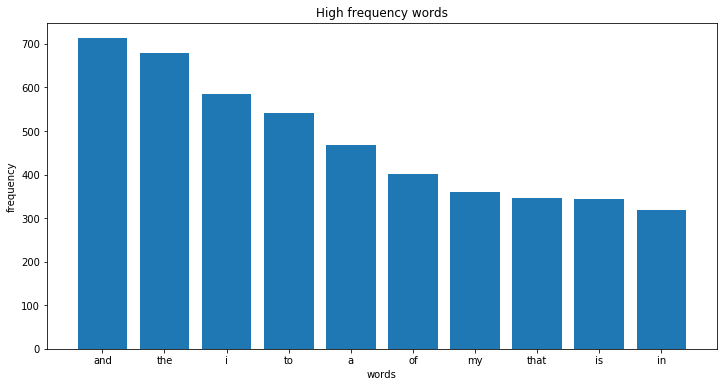

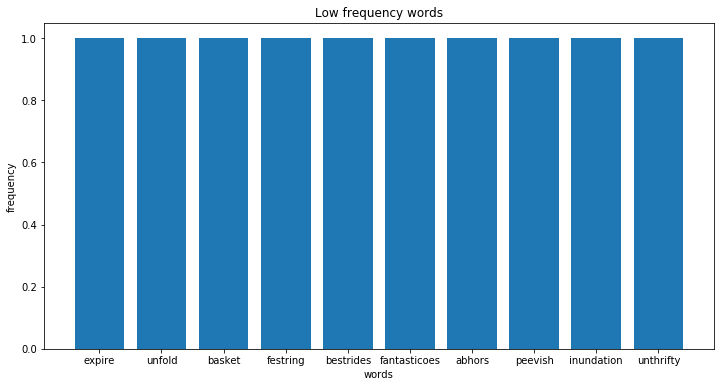

In [51]:
# asc_list is a list of tuples: [(word1,frequency1),(word2, frequency2), ...]
# it is arranged such that the frequencies of the words are in ascending order

import operator
import numpy as np

asc_list = sorted(words_dict.items(), key=operator.itemgetter(1))
list_length = len(asc_list)
high_frequency_items = asc_list[list_length - 10:list_length]
low_frequency_items = asc_list[:10]

# function unpack: unpack a list of tuples into two separate lists
# input: a list of tuples - [(word1, frequency1), (word2, frequency2), ...]
# output: two lists: [word1, word2, ...], [frequency1, frequency2, ...]

def unpack(frequency_items):
    words = []
    frequencies = []
    for item in frequency_items:
        word = item[0]
        freq = item[1]
        words.append(word)
        frequencies.append(freq)
    return np.array(words), np.array(frequencies)

import matplotlib.pyplot as plt

high_frequency_words, high_frequencies = unpack(high_frequency_items)
low_frequency_words, low_frequencies = unpack(low_frequency_items)

plt.bar(high_frequency_words[::-1],high_frequencies[::-1])
plt.title('High frequency words')
plt.xlabel('words')
plt.ylabel('frequency')

plt.figure()
plt.bar(low_frequency_words,low_frequencies)
plt.title('Low frequency words')
plt.xlabel('words')
plt.ylabel('frequency')

# change the figure size so it's easier to see the x axis
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams['figure.figsize'] = fig_size



Instead of plotting all the words and their respective occurences in one graph, words with highest and lowest occurences are graphed for a clearer view. The words in high frequency words plot are stop words, the most common words in the English language. They can't reveal meaningful message associated with the given text. 
As for the low frequency plot, here only shows ten of the words with single occurence since there are too many one time appearance words in the given text. 

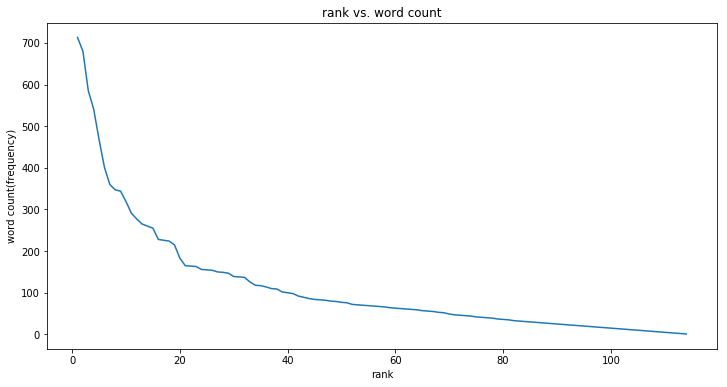

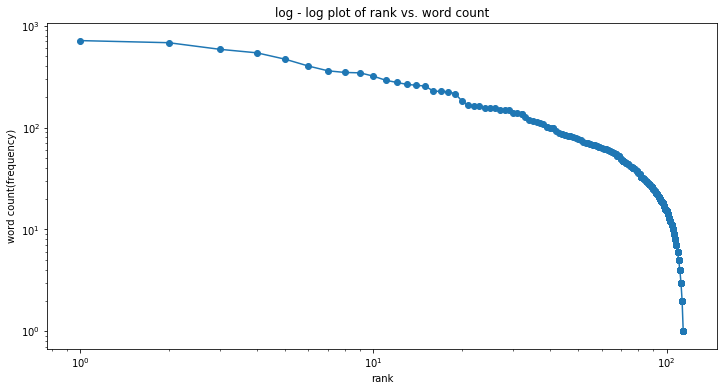

In [52]:
# function ranking:
# input: a list of tuples in descending frequency - [(word1, frequency1), (word2, frequency2), ...]
# output: lists of ranks and frequencies of words: - [rank1, rank2, ...], [frequency1, frequency2, ...]

def ranking(word_freq):
    ranks = []
    freqs = []
    for item in word_freq:
        word = item[0]
        freq = item[1]
        # since the input is in descending order, the first item would be ranked 1
        if word_freq.index(item) == 0:
            rank = 1
        # if the current frequency is smaller than previous frequency, rank is lowered
        elif freq < freqs[-1]:
            rank = ranks[-1]+1
        # if the current frequency is the same as previous frequency, rank is the same
        else:
            rank = ranks[-1]
        ranks.append(rank)
        freqs.append(freq)
    return ranks, freqs

desc_list = asc_list[::-1]
ranks, freqs = ranking(desc_list)
plt.plot(ranks,freqs)
plt.title('rank vs. word count')
plt.xlabel('rank')
plt.ylabel('word count(frequency)')

plt.figure()
plt.loglog(ranks, freqs)
plt.scatter(ranks, freqs)
plt.title('log - log plot of rank vs. word count')
plt.xlabel('rank')
plt.ylabel('word count(frequency)')
plt.show()


From the rank vs. word count graphs, we can see that the word counts of high ranked words drop more drastically compared to those of low ranked words. This makes sense since the high ranked words are mostly stop words. Although the number of stop words are limited, their frequencies are high, corresponding to the initial drastic drop. The decrease in frequency is more gradual below rank 20, which means the occurences of words other than stop words are more uniform. 